# Use of topic-related multi-word expressions in Pre-sessional student writing

**Research questions:**

1. Is there a relationship between writing proficiency judgements (OBE score) and the range of topic-related multi-word expressions (Types) in student writing?
2. Is there a relationship between writing proficency judgements (OBE score) and the number of topic-related multi-word expressions (Tokens) in student writing?

**Notes:** Writing samples are from a corpus of student submissions to the university's Pre-sessional Open Book Exam. Topic-related multi-word expressions were extracted from a corpus of set texts studied by students in preparation for the Open Book Exam.   

In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Import data to pandas dataframe

**Note:** Standardised Types = (Types/Word count)\*100. Standardised Tokens = (Tokens/Word count)\*100.  

In [72]:
df = pd.read_csv('foodSecuritySamplesData.csv')

In [73]:
df.head()

,Sample code,First language,OBE score,OBE grade,Word count,Types,Tokens,Standardised Types,Standardised Tokens
0,A7600CHI001,Chinese,76.0,Advanced,885.0,16.0,34.0,1.807910,3.841808
1,A7600CHI002,Chinese,76.0,Advanced,832.0,14.0,34.0,1.682692,4.086538
2,A7500CHI003,Chinese,75.0,Advanced,900.0,17.0,37.0,1.888889,4.111111
3,G7350CHI004,Chinese,73.5,Good,820.0,13.0,29.0,1.585366,3.536585
4,G7200CHI005,Chinese,72.0,Good,900.0,14.0,34.0,1.555556,3.777778


## 2. Exploratory data analysis

**Notes:** The range of scores for Standardised Types and Tokens is fairly high, e.g. the maximum Standardised Types score is 2.57 standard deviations from the mean and the maximum Standardised Tokens score is 2.97 standard deviations from the mean. Both the histogram and boxplot show that OBE scores have a right-skewed distribution - there are also two extreme outliers. The scatterplots show no strong linear relationship, though the highest scores for Standardised Types seem to be clustered at the lower end of the OBE score range.    

In [74]:
df.describe()

,OBE score,Word count,Types,Tokens,Standardised Types,Standardised Tokens
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.005137,817.506849,11.184932,29.089041,1.372893,3.559985
std,4.124618,82.035085,3.153550,8.503891,0.383374,0.984911
min,65.000000,620.000000,3.000000,10.000000,0.461538,1.222222
25%,70.000000,754.250000,9.000000,23.000000,1.126450,2.763734
50%,73.375000,841.500000,11.000000,30.000000,1.346656,3.684518
75%,75.750000,888.000000,14.000000,34.000000,1.627789,4.243981
max,87.500000,981.000000,20.000000,58.000000,2.356406,6.480447


array([[<AxesSubplot:title={'center':'OBE score'}>,
        <AxesSubplot:title={'center':'Word count'}>],
       [<AxesSubplot:title={'center':'Types '}>,
        <AxesSubplot:title={'center':'Tokens'}>],
       [<AxesSubplot:title={'center':'Standardised Types'}>,
        <AxesSubplot:title={'center':'Standardised Tokens'}>]],
      dtype=object)

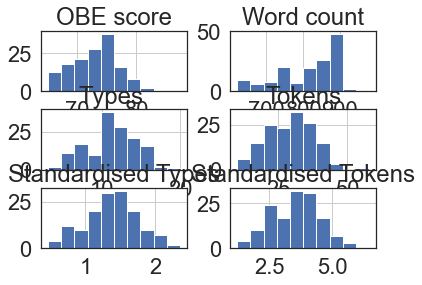

In [75]:
df.hist()

<AxesSubplot:>

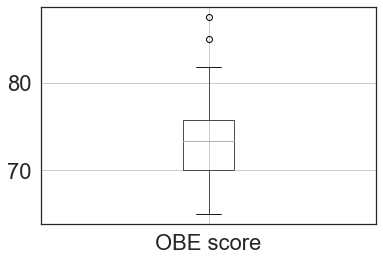

In [76]:
df.boxplot(column = ['OBE score'])

<AxesSubplot:>

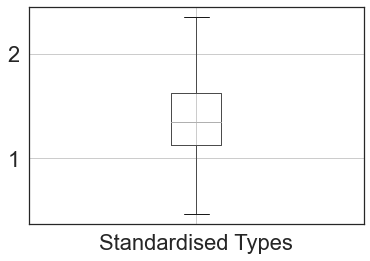

In [77]:
df.boxplot(column = ['Standardised Types'])

<AxesSubplot:>

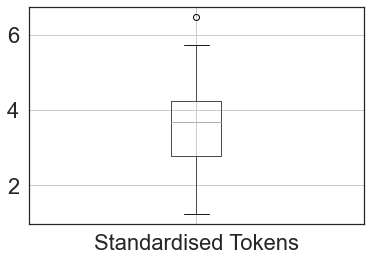

In [78]:
df.boxplot(column = ['Standardised Tokens'])

<AxesSubplot:title={'center':'Scatter plot between OBE score and Standardised n-gram types'}, xlabel='OBE score', ylabel='Standardised Types'>

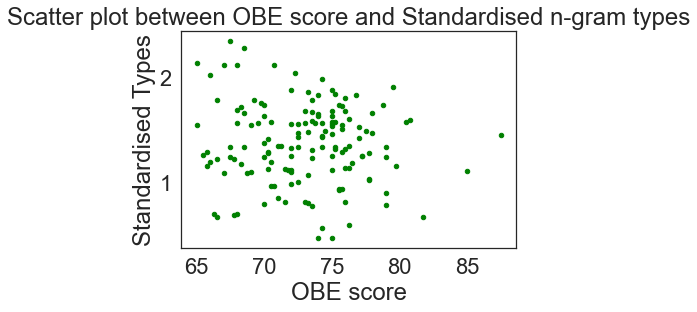

In [79]:
df.plot.scatter(x = 'OBE score', y = 'Standardised Types', color = (0, 0.5, 0), title = 'Scatter plot between OBE score and Standardised n-gram types')

<AxesSubplot:title={'center':'Scatter plot between OBE score and Standardised n-gram tokens'}, xlabel='OBE score', ylabel='Standardised Tokens'>

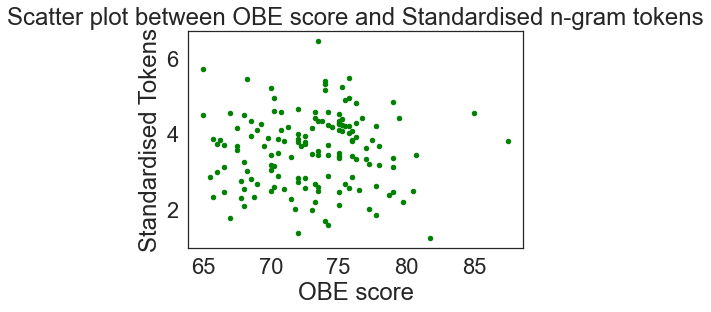

In [80]:
df.plot.scatter(x = 'OBE score', y = 'Standardised Tokens', color = (0, 0.5, 0), title = 'Scatter plot between OBE score and Standardised n-gram tokens')

## 3. Check normality assumptions 

**Note 1:** Q-Q seem to confirm that the OBE score variable has a heavy right tail, and p value is significant on Shapiro-Wilk test. So Pearson correlation is not appropriate.   

**Note 2:** The qqplot() function below seems to both display the results *and* draw the plot, resulting in duplicate plots. I got around this by assigning the results to a variable.   

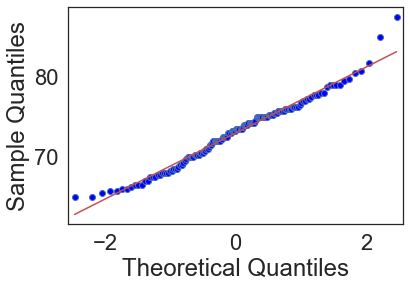

In [81]:
 i = sm.qqplot(df['OBE score'], line='s')

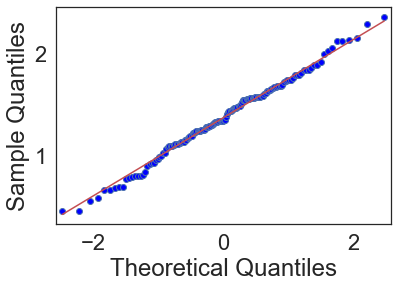

In [82]:
j = sm.qqplot(df['Standardised Types'], line='s')

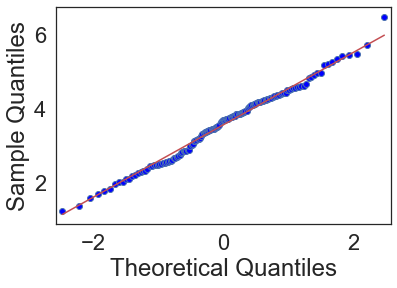

In [83]:
k = sm.qqplot(df['Standardised Tokens'], line='s')

In [84]:
from scipy.stats import shapiro

In [85]:
stat, p = shapiro(df['OBE score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.980, p=0.032


In [86]:
stat, p = shapiro(df['Standardised Types'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.993, p=0.702


In [87]:
stat, p = shapiro(df['Standardised Tokens'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.991, p=0.482


## 4. Statistical analysis

**Notes:** Spearman rank correlation is used due to violations of Pearson correlation assumptions. There appears to be no significant relationship between the variables.  

In [88]:
from scipy.stats import spearmanr

In [89]:
a = df['OBE score']
b = df['Standardised Types']

coef, p = spearmanr(a, b)
print('Spearmans correlation coeficient=%.3f, p=%.3f' % (coef, p))

Spearmans correlation coeficient=-0.035, p=0.672


In [90]:
c = df['OBE score']
d = df['Standardised Tokens']

coef, p = spearmanr(c, d)
print('Spearmans correlation coeficient=%.3f, p=%.3f' % (coef, p))

Spearmans correlation coeficient=0.036, p=0.669


## 5. Data visualisation 

Text(0.5, 1.0, 'Scatter plot between OBE score and MWE types per 100 words\n')

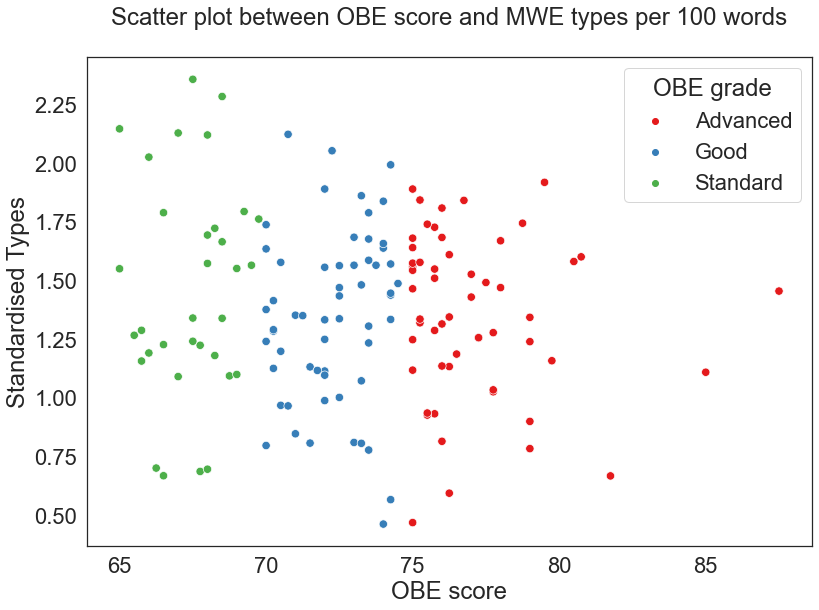

In [91]:
sns.set(font_scale = 2, style = 'white')

plt.figure(figsize = (13, 9))
sns.scatterplot(x = 'OBE score', y = 'Standardised Types', s = 70, data = df, hue = 'OBE grade', palette = 'Set1')
plt.title('Scatter plot between OBE score and MWE types per 100 words\n')

Text(0.5, 1.0, 'Scatter plot between OBE score and MWE tokens per 100 words\n')

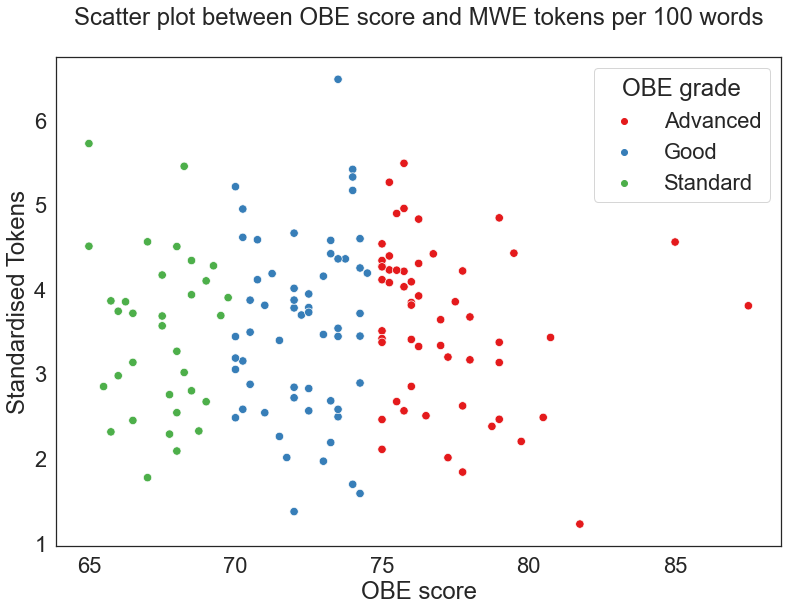

In [92]:
plt.figure(figsize = (13, 9))
sns.scatterplot(x = 'OBE score', y = 'Standardised Tokens', s = 70, data = df, hue = 'OBE grade', palette = 'Set1')
plt.title('Scatter plot between OBE score and MWE tokens per 100 words\n')